In [85]:
# PyPortfolioOpt does the hard work for us, allowing for one-liners like ef.min_volatility() to generage
# a portfolio that minimises the volatility, while at the same time allowing for more complex problems
# PyPortfolioOpt documentation says "this is all possible thanks to cvxpy, the python-embedded modelling
# language for complex optimisation upon which PyPortfolioOpt's efficient frontier functionality lies". 

In [86]:
# in these examples demonstrating PyPortfolioOpt's mean-variance capabilities, we start with a list of tickers
# Robert Martin, PyPortfolioOpt's author, suggest between 10-50 stocks as a starting point

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [88]:
df = pd.read_csv("br_stocks.csv", parse_dates=True, index_col="Date")

In [89]:
df.head()

,ITSA4,GOAU4,CMIG3,PETR4,TOTS3,USIM5,LAME4,BBAS3,CIEL3,LIGT3,ABEV3,KLBN11,VVAR3,CVCB3,GOLL4,EMBR3,CSNA3
Date,,,,,,,,,,,,,,,,,
2015-10-26,4.337310,2.629987,4.889023,7.282466,32.969135,2.948654,14.489809,12.885270,21.604973,12.372133,17.280500,19.230658,3.310584,13.152596,3.55,25.767944,4.115990
2015-10-27,4.301952,2.516463,4.774228,7.050539,33.044613,2.948654,14.449583,13.058755,21.803387,12.225429,17.394650,19.053841,3.310584,12.932006,3.56,26.999142,4.082797
2015-10-28,4.272487,2.450240,4.855263,7.375236,32.081654,2.822561,14.425447,12.837956,21.489256,12.117845,17.245377,18.854654,2.803557,13.400757,3.56,26.970060,4.016410
2015-10-29,4.207663,2.374557,4.747219,7.059817,31.430193,2.725565,13.572176,12.222869,20.557831,12.078724,16.683409,18.524618,2.475481,13.327228,3.49,27.183344,3.576597
2015-10-30,4.243021,2.459701,4.835006,7.152587,32.261009,2.696467,13.451403,12.593497,20.144411,12.548180,16.762438,18.558466,2.883091,13.419142,3.55,27.416006,3.601491


In [90]:
prices = ohlc["Adj Close"]
prices.tail()

,ACN,AMZN,BLK,COST,DIS,F,GILD,JPM,KO,LUV,MA,MMM,MS,MSFT,PFE,T,TSLA,TWTR,UNH,XOM
Date,,,,,,,,,,,,,,,,,,,,
2020-10-20,230.389999,3217.010010,645.070007,378.309998,124.949997,7.74,60.549999,100.370003,50.250000,40.160000,331.720001,170.949997,51.470001,214.649994,37.490002,26.760000,421.940002,46.349998,323.410004,33.700001
2020-10-21,233.100006,3184.939941,634.989990,377.820007,126.629997,7.85,60.209999,99.370003,49.990002,39.840000,333.420013,169.169998,50.380001,214.800003,37.080002,26.719999,422.640015,50.240002,322.790009,33.160000
2020-10-22,228.139999,3176.399902,635.179993,375.750000,127.559998,8.21,60.669998,102.879997,50.680000,41.930000,333.600006,170.710007,51.770000,214.889999,37.430000,28.280001,425.790009,50.279999,325.730011,34.860001
2020-10-23,229.699997,3204.399902,637.309998,374.600006,128.350006,8.16,60.790001,103.809998,50.520000,42.790001,329.609985,169.800003,51.869999,216.229996,38.180000,27.820000,420.630005,50.439999,330.600006,34.160000
2020-10-26,220.699997,3223.165039,621.580017,368.929993,124.764999,7.98,59.586700,101.139999,49.525002,41.361698,319.519897,166.250000,50.270000,212.927704,37.580002,27.305000,417.954987,49.654999,323.225006,33.154999


In [91]:
# now we will calculate the covariance matrix, input for the MV portfolio

In [92]:
import pypfopt
pypfopt.__version__

'1.2.6'

In [93]:
returns = expected_returns.capm_return(df)
returns.head()

ITSA4    0.169530
GOAU4    0.275060
CMIG3    0.236142
PETR4    0.258651
TOTS3    0.152013
Name: mkt, dtype: float64

In [94]:
import pandas as pd
import numpy as np
import cvxpy as cp
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import objective_functions
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import HRPOpt
from pypfopt import CLA
from pypfopt import black_litterman
from pypfopt import BlackLittermanModel
from pypfopt import plotting

sample_cov = risk_models.sample_cov(df, frequency=252)
sample_cov

,ITSA4,GOAU4,CMIG3,PETR4,TOTS3,USIM5,LAME4,BBAS3,CIEL3,LIGT3,ABEV3,KLBN11,VVAR3,CVCB3,GOLL4,EMBR3,CSNA3
ITSA4,0.106266,0.094993,0.098203,0.104835,0.050166,0.104282,0.075074,0.123885,0.067584,0.087071,0.044329,0.023509,0.081927,0.093132,0.142570,0.055744,0.102228
GOAU4,0.094993,0.328751,0.139799,0.177492,0.071271,0.274447,0.103135,0.154817,0.087976,0.125427,0.056984,0.047403,0.140966,0.128543,0.217926,0.075680,0.257616
CMIG3,0.098203,0.139799,0.240716,0.139415,0.066079,0.159084,0.104854,0.148635,0.079999,0.159106,0.055980,0.031726,0.118915,0.126809,0.214762,0.069165,0.151079
PETR4,0.104835,0.177492,0.139415,0.277875,0.073124,0.191634,0.114993,0.172577,0.092070,0.119288,0.058783,0.045892,0.119123,0.137196,0.219356,0.080450,0.199364
TOTS3,0.050166,0.071271,0.066079,0.073124,0.240080,0.065111,0.065522,0.075296,0.072754,0.056432,0.036927,0.027804,0.074328,0.074532,0.108289,0.051181,0.076359
USIM5,0.104282,0.274447,0.159084,0.191634,0.065111,0.433124,0.115517,0.175969,0.102846,0.141380,0.056395,0.044733,0.152370,0.143734,0.270876,0.074938,0.294184
LAME4,0.075074,0.103135,0.104854,0.114993,0.065522,0.115517,0.179010,0.114198,0.079862,0.084227,0.053773,0.037566,0.129063,0.121231,0.157290,0.052131,0.115123
BBAS3,0.123885,0.154817,0.148635,0.172577,0.075296,0.175969,0.114198,0.227995,0.095646,0.131219,0.055649,0.030508,0.138464,0.143079,0.216086,0.073787,0.159577
CIEL3,0.067584,0.087976,0.079999,0.092070,0.072754,0.102846,0.079862,0.095646,0.223958,0.084380,0.052282,0.026414,0.091474,0.089493,0.135835,0.062857,0.097090
LIGT3,0.087071,0.125427,0.159106,0.119288,0.056432,0.141380,0.084227,0.131219,0.084380,0.287086,0.051788,0.025331,0.138131,0.133126,0.208813,0.069075,0.121305


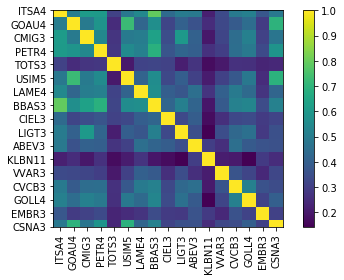

In [95]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

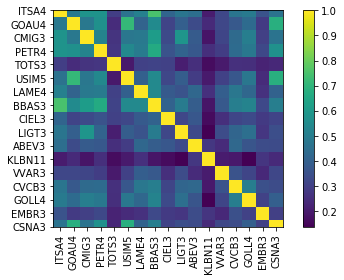

In [96]:
# shrinking the covariance matrix with Ledoit-Wolf shrinkage model:
S = risk_models.CovarianceShrinkage(df).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

In [97]:
# return estimation is another necessary input for the portfolio optimisation. this example uses capm returns, 
# which aims to be slightly more stable than the defult mean historical returns:

from pypfopt import expected_returns

mu = expected_returns.capm_return(df)
mu

ITSA4     0.169530
GOAU4     0.275060
CMIG3     0.236142
PETR4     0.258651
TOTS3     0.152013
USIM5     0.307661
LAME4     0.194876
BBAS3     0.249809
CIEL3     0.178437
LIGT3     0.227808
ABEV3     0.118046
KLBN11    0.092036
VVAR3     0.271635
CVCB3     0.252626
GOLL4     0.383218
EMBR3     0.158225
CSNA3     0.297387
Name: mkt, dtype: float64

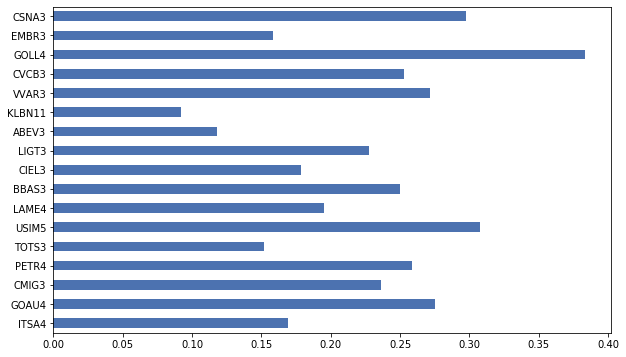

In [98]:
mu.plot.barh(figsize=(10,6));

In [152]:
# when dealing with MVP, constraints to the investments are frequent. long/short min variance is used in
# this example. 

from pypfopt import EfficientFrontier
S = risk_models.CovarianceShrinkage(df).ledoit_wolf()

ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

/Users/Grilli/opt/anaconda3/lib/python3.7/site-packages/pypfopt/efficient_frontier.py:112: UserWarning: No expected returns provided. You may only use ef.min_volatility()
  "No expected returns provided. You may only use ef.min_volatility()"


OrderedDict([('ITSA4', 0.30706),
             ('GOAU4', 0.00295),
             ('CMIG3', 0.00255),
             ('PETR4', -0.02352),
             ('TOTS3', 0.08104),
             ('USIM5', 0.02529),
             ('LAME4', 0.0465),
             ('BBAS3', -0.07457),
             ('CIEL3', 0.03276),
             ('LIGT3', 0.04306),
             ('ABEV3', 0.36094),
             ('KLBN11', 0.27975),
             ('VVAR3', -0.00425),
             ('CVCB3', -0.03293),
             ('GOLL4', -0.05811),
             ('EMBR3', 0.05667),
             ('CSNA3', -0.04518)])

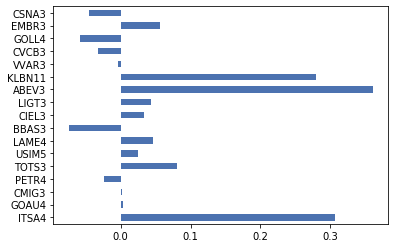

In [153]:
pd.Series(weights).plot.barh();

In [154]:
# the following code outputs a indication of our portfolio's performance. this is as the sample estimate
# and may have very little resemblance to how the portfolio actually performs - theory guides us, but it is
# not perfect. if we are happy with the portfolio, we can construct the actual allocation on the next code

In [155]:
ef.portfolio_performance(verbose=True)

Annual volatility: 21.9%


(None, 0.21946880525432455, None)

In [156]:
# if we had 100,000 to invest and we would like our portfolio to be 125/25 long/short:

In [208]:
from pypfopt import DiscreteAllocation

latest_prices = df.iloc[-1] # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000, short_ratio=0.30)
alloc, leftover = da.lp_portfolio()
print("Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with ${leftover:.2f} leftover


{'ITSA4': 1291,
 'GOAU4': 214,
 'CMIG3': 329,
 'PETR4': 68,
 'TOTS3': 328,
 'USIM5': 85,
 'LAME4': 276,
 'BBAS3': 52,
 'CIEL3': 1914,
 'LIGT3': 256,
 'ABEV3': 1300,
 'KLBN11': 754,
 'VVAR3': 69,
 'CVCB3': 72,
 'EMBR3': 1271}

In [209]:
# Max Sharpe with sector constrints: let's construct a long-only max-sharpe portfolio, incorporating 
# sector constraints. this will require three things - a sector_mapper, your sector_lower and sector_upper bounds

sector_mapper = {
    "ITSA4": "Financial Services",
    "GOAU4": "Industrials",
    "CMIG3": "Energy",
    "TOTS3": "Tech",
    "USIM5": "Industrials",
    "LAME4": "Consumer Cyclical",
    "CIEL3": "Financial Services",
    "LIGT3": "Energy",
    "ABEV3": "Consumer Staples",
    "KLBN11": "Paper and Forest",
    "EMBR3": "Aerospacial",
    "PETR4": "Oil & Gas",
    "BBAS3": "Financial Services",
    "VVAR3": "Consumer Cyclical",
    "CVCB3": "Consumer Discretionary",
    "GOLL4": "Aerospacial",
    "CSNA3": "Industrials",
}

sector_lower = {
    "Consumer Staples": 0.05, # at least 10% to staples
    "Financial Services": 0.05 # at least 5% to tech
    # for all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Tech": 0.5,
    "Aerospace": 0.5,
    "Energy": 0.5,
    "Consumer Cyclical": 0.5
}

In [210]:
# we than set up the optimiser and add the constraints. we can use ef.add_objective() to add other constraints.
# for example, let's say that in addition to the above sector constraints we want: 
# 10% of the portfolio in AMZN
# less than 10% in TSLA:

mu = expected_returns.capm_return(df)
S = risk_models.CovarianceShrinkage(df).ledoit_wolf()

ef = EfficientFrontier(mu, S) # weight_bounds will be set to (0,1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

itsa4_index = ef.tickers.index("ITSA4")
ef.add_constraint(lambda w: w[itsa4_index] == 0.50)

goau4_index = ef.tickers.index("GOAU4")
ef.add_constraint(lambda w: w[goau4_index] <= 0.50)

ef.add_constraint(lambda w: w[10] >= 0.10)

ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('ITSA4', 0.5),
             ('GOAU4', 0.04518),
             ('CMIG3', 0.0),
             ('PETR4', 0.01784),
             ('TOTS3', 0.02116),
             ('USIM5', 0.06119),
             ('LAME4', 0.0),
             ('BBAS3', 0.0),
             ('CIEL3', 0.00274),
             ('LIGT3', 0.02408),
             ('ABEV3', 0.1),
             ('KLBN11', 0.0),
             ('VVAR3', 0.06463),
             ('CVCB3', 0.0393),
             ('GOLL4', 0.06397),
             ('EMBR3', 0.00052),
             ('CSNA3', 0.0594)])

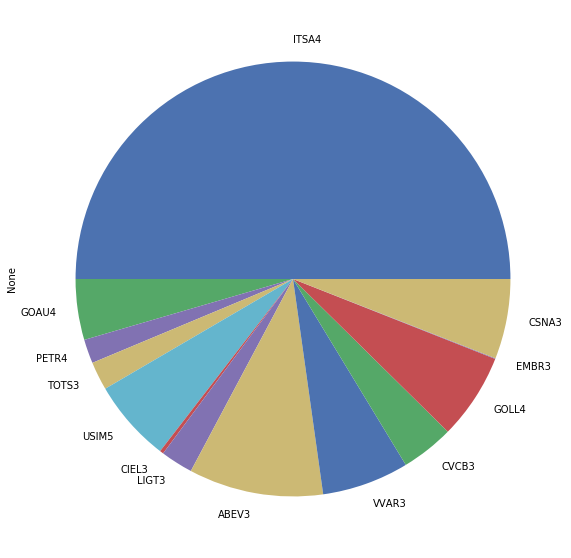

In [211]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [212]:
# we can immediately see that our explicit constraints were satisfied, and check the sector constraints:

In [213]:
# O(N^2) loop not a good idea in a coding interview aha
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Tech: 0.021
Paper and Forest: 0.000
Consumer Cyclical: 0.065
Energy: 0.024
Oil & Gas: 0.018
Consumer Discretionary: 0.039
Consumer Staples: 0.100
Aerospacial: 0.064
Financial Services: 0.503
Industrials: 0.166


In [214]:
# Maximise the return for a given level of risk, with L2 regularization: "let's imagina that we've put a lot
# of thought into our risk tolerance, and have decided that we can't accept anything more than 15% volatility.
# We can use PyPortfolioOpt to construct a portfolio that maximises return for a given risk:

In [215]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.5)
weights = ef.clean_weights()
weights

OrderedDict([('ITSA4', 0.0),
             ('GOAU4', 0.05039),
             ('CMIG3', 0.0),
             ('PETR4', 0.06509),
             ('TOTS3', 0.0),
             ('USIM5', 0.14571),
             ('LAME4', 0.0),
             ('BBAS3', 0.05712),
             ('CIEL3', 0.0),
             ('LIGT3', 0.0),
             ('ABEV3', 0.05),
             ('KLBN11', 0.0),
             ('VVAR3', 0.11282),
             ('CVCB3', 0.04997),
             ('GOLL4', 0.29295),
             ('EMBR3', 0.0),
             ('CSNA3', 0.17595)])

In [216]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} ticker have zero weight")

8/17 ticker have zero weight


In [217]:
ef.portfolio_performance(verbose=True);

Expected annual return: 30.4%
Annual volatility: 50.0%
Sharpe Ratio: 0.57


In [218]:
# we might be worried about the fact that, in order to obtain the highest return given a 15% level of 
# volatility, many assets will be assigned zero weight. the optimiser is overfitting the data. 
# we are more likely to get better results by enforcin some level of diversification. L2 regularisation 
# does that, essentially it adds a penalty on the number of near-zero weights. 

In [219]:
from pypfopt import objective_functions

# you must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1) #gamma is the tuning parameter
ef.efficient_risk(0.25)
weights = ef.clean_weights()
weights

OrderedDict([('ITSA4', 0.15192),
             ('GOAU4', 0.02717),
             ('CMIG3', 0.03206),
             ('PETR4', 0.01261),
             ('TOTS3', 0.07969),
             ('USIM5', 0.02721),
             ('LAME4', 0.06262),
             ('BBAS3', 0.00668),
             ('CIEL3', 0.05704),
             ('LIGT3', 0.04996),
             ('ABEV3', 0.20123),
             ('KLBN11', 0.1894),
             ('VVAR3', 0.01957),
             ('CVCB3', 0.00838),
             ('GOLL4', 0.0),
             ('EMBR3', 0.07256),
             ('CSNA3', 0.0019)])

In [220]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small} / {len(ef.tickers)} tickers have zero weight")

1 / 17 tickers have zero weight


In [221]:
# "we can tune the value of gamma to choose the number of nonzero tickers. larger gamma pulls
# portfolio weights towards an equal allocation...

In [222]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1) 
ef.efficient_risk(0.25)
weights = ef.clean_weights()
weights

OrderedDict([('ITSA4', 0.12703),
             ('GOAU4', 0.02218),
             ('CMIG3', 0.03588),
             ('PETR4', 0.01409),
             ('TOTS3', 0.09337),
             ('USIM5', 0.00991),
             ('LAME4', 0.07155),
             ('BBAS3', 0.01733),
             ('CIEL3', 0.07177),
             ('LIGT3', 0.04914),
             ('ABEV3', 0.18064),
             ('KLBN11', 0.19226),
             ('VVAR3', 0.01391),
             ('CVCB3', 0.01081),
             ('GOLL4', 0.0),
             ('EMBR3', 0.09013),
             ('CSNA3', 0.0)])

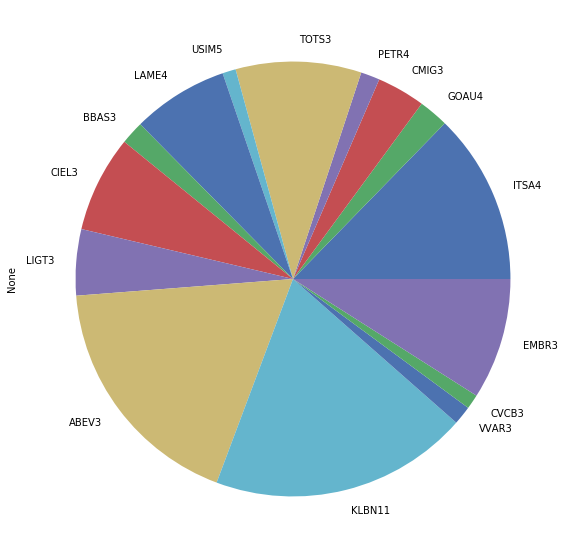

In [223]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [224]:
ef.portfolio_performance(verbose=True);

Expected annual return: 15.9%
Annual volatility: 25.0%
Sharpe Ratio: 0.56


In [225]:
# we can also ge in the situation in which we have a certain required rate of return (actuarial goal for
# pension funds, for instance), but would like to minimise risk. Moreover, suppose we would like our 
# portfolio to be market neutral, in the sense that it is equally exposed to the long and short sides:

In [229]:
# we must add no weight bounds to allow shortsales. 
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.3, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('ITSA4', -0.20926),
             ('GOAU4', 0.16117),
             ('CMIG3', 0.04683),
             ('PETR4', 0.13008),
             ('TOTS3', -0.21938),
             ('USIM5', 0.25191),
             ('LAME4', -0.09236),
             ('BBAS3', 0.10295),
             ('CIEL3', -0.13215),
             ('LIGT3', 0.01416),
             ('ABEV3', -0.39754),
             ('KLBN11', -0.4791),
             ('VVAR3', 0.17327),
             ('CVCB3', 0.11662),
             ('GOLL4', 0.49261),
             ('EMBR3', -0.20614),
             ('CSNA3', 0.24633)])

In [230]:
ef.portfolio_performance(verbose=True);

Expected annual return: 30.0%
Annual volatility: 69.4%
Sharpe Ratio: 0.40


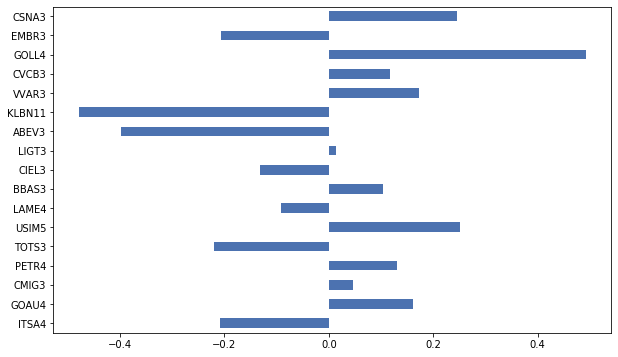

In [231]:
pd.Series(weights).plot.barh(figsize=(10,6));

In [232]:
print(f"Net weight: {sum(weights.values()):.2f}")

Net weight: 0.00


In [233]:
# plotting - to plot the unconstrained efficient frontier, we can use the critical line algorithm

In [234]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 20.3%
Annual volatility: 30.4%
Sharpe Ratio: 0.60


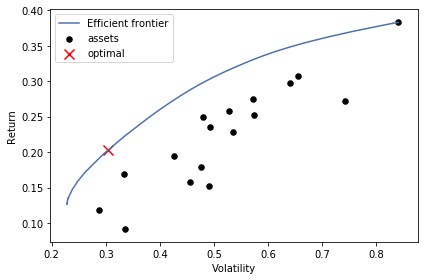

In [235]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [236]:
# finally, PyPortfolioOpt does not support plotting the constrained efficient frontier. 
# it is possible to do this manually by looping over portfolios:

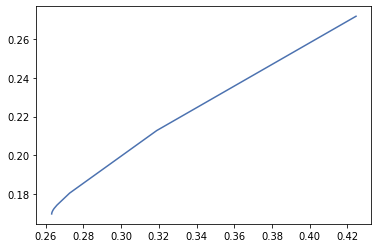

In [237]:
returns, sigmas = [], []
for delta in np.arange(1, 100, 1):
    ef = EfficientFrontier(mu, S, weight_bounds=(0.02, 0.15))
    ef.max_quadratic_utility(delta)
    ret, sigma, _ = ef.portfolio_performance()
    returns.append(ret)
    sigmas.append(sigma)
plt.plot(sigmas, returns);